In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis.rdf import InterRDF
import warnings
from matplotlib import pyplot as plt
import numpy as np
u= mda.Universe("vars/output_no_water.gro", "vars/output_no_water.xtc")
NUM_PROTEINS = 50
PROTEIN_LEN = 129
all_prot = u.select_atoms(f"bynum 1:6450")
prot1 = u.select_atoms(f"bynum 1:{PROTEIN_LEN}")
prot2 = u.select_atoms(f"bynum {PROTEIN_LEN+1}:{2*PROTEIN_LEN}")
print(len(prot1))
prot2_50 = u.select_atoms(f"bynum {PROTEIN_LEN+1}:6450")
print(len(prot2_50))
args = [[all_prot, all_prot]]

# rdf = InterRDF(prot1, all_prot)
# # can skip frames
# rdf.run(start=1, stop=2)

# plt.plot(rdf.bins, rdf.rdf)
# print(len(rdf.rdf))

129
6321


/opt/conda/envs/gromacs/lib/python3.12/site-packages/MDAnalysis/analysis/rdf.py:347: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)
/opt/conda/envs/gromacs/lib/python3.12/site-packages/MDAnalysis/analysis/rdf.py:339: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/tmp/ipykernel_1632075/2002008008.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


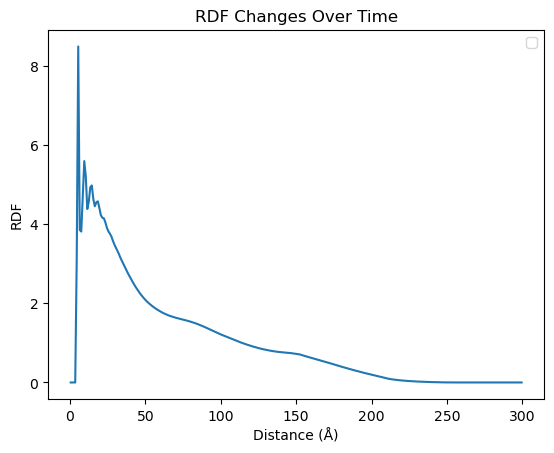

In [2]:
from MDAnalysis.analysis.rdf import InterRDF
import matplotlib.pyplot as plt

# Define AtomGroups for the RDF calculation
ag1 = prot1
ag2 = prot2_50

rdf = InterRDF(ag1, ag2, range=(0, 300), nbins = 300)
rdf.run()

# Store the RDF result for this window
results = rdf.rdf

plt.plot(rdf.bins, rdf.rdf)

plt.xlabel("Distance (Å)")
plt.ylabel("RDF")
plt.legend()
plt.title("RDF Changes Over Time")
plt.show()

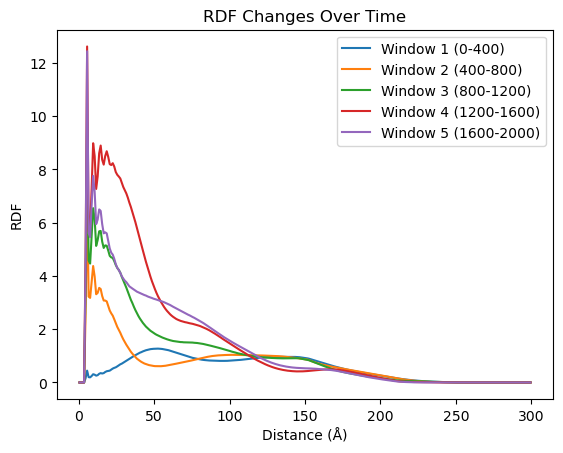

In [3]:
from MDAnalysis.analysis.rdf import InterRDF
import matplotlib.pyplot as plt

# Define AtomGroups for the RDF calculation
ag1 = prot1
ag2 = prot2_50

# Parameters
num_windows = 5
frames_per_window = 400

rdf_results = []

# Loop over each time window
for i in range(num_windows):
    start_frame = i * frames_per_window
    stop_frame = start_frame + frames_per_window

    # Create InterRDF object and run for the time window
    rdf = InterRDF(ag1, ag2, range=(0, 300), nbins = 300)
    rdf.run(start=start_frame, stop=stop_frame)

    # Store the RDF result for this window
    rdf_results.append(rdf.rdf)

    # Plot RDF for this time window
    plt.plot(rdf.results.bins, rdf.results.rdf, label=f"Window {i+1} ({start_frame}-{stop_frame})")

plt.xlabel("Distance (Å)")
plt.ylabel("RDF")
plt.legend()
plt.title("RDF Changes Over Time")
plt.show()